In [1]:
import pandas as pd
import numpy as np
import matplotlib
import seaborn as sns
import sklearn
%matplotlib inline

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,precision_score
from sklearn.preprocessing import LabelEncoder

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
print("pandas:", pd.__version__)
print("numpy:", np.__version__)
print("matplotlib:", matplotlib.__version__)
print("seaborn:", sns.__version__)
print("sklearn:", sklearn.__version__)

pandas: 2.2.2
numpy: 1.26.4
matplotlib: 3.9.0
seaborn: 0.13.2
sklearn: 1.5.1


In [5]:
df = pd.read_csv('./Dataset/xbox_search.csv')

In [6]:
df.head()

,user,sku,category,query,click_time,query_time
0,0001cd0d10bbc585c9ba287c963e00873d4c0bfd,2032076,abcat0701002,gears of war,2011-10-09 17:22:56.101,2011-10-09 17:21:42.917
1,00033dbced6acd3626c4b56ff5c55b8d69911681,9854804,abcat0701002,Gears of war,2011-09-25 13:35:42.198,2011-09-25 13:35:33.234
2,00033dbced6acd3626c4b56ff5c55b8d69911681,2670133,abcat0701002,Gears of war,2011-09-25 13:36:08.668,2011-09-25 13:35:33.234
3,00033dbced6acd3626c4b56ff5c55b8d69911681,9984142,abcat0701002,Assassin creed,2011-09-25 13:37:23.709,2011-09-25 13:37:00.049
4,0007756f015345450f7be1df33695421466b7ce4,2541184,abcat0701002,dead island,2011-09-11 15:15:34.336,2011-09-11 15:15:26.206


In [7]:
df.describe()

,sku
count,4.236500e+04
mean,2.360281e+11
std,4.858031e+13
min,1.004622e+06
25%,2.173065e+06
50%,2.670133e+06
75%,3.046603e+06
max,9.999169e+15


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42365 entries, 0 to 42364
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user        42365 non-null  object
 1   sku         42365 non-null  int64 
 2   category    42365 non-null  object
 3   query       42365 non-null  object
 4   click_time  42365 non-null  object
 5   query_time  42365 non-null  object
dtypes: int64(1), object(5)
memory usage: 1.9+ MB


In [9]:
df.dtypes

user          object
sku            int64
category      object
query         object
click_time    object
query_time    object
dtype: object

# Exploratory Data Analysis

In [10]:
df['query'].value_counts()

query
Gears of war 3                             1471
Dead island                                1350
Battlefield 3                              1012
dead island                                 911
gears of war 3                              877
                                           ... 
ccall of duty modern warfare 3 hardened       1
Batman the brave and the bold                 1
dc xbox                                       1
chuck dvd                                     1
Limited edition forza 4                       1
Name: count, Length: 5960, dtype: int64

In [11]:
df['query'].unique()

array(['gears of war', 'Gears of war', 'Assassin creed', ...,
       'Xbox fable ii', 'legend of troy', 'Limited edition forza 4'],
      dtype=object)

In [12]:
df['query'].nunique()

5960

In [13]:
df.isna().sum()

user          0
sku           0
category      0
query         0
click_time    0
query_time    0
dtype: int64

In [14]:
df['sku'].value_counts()[0:10]

sku
9854804    2966
2107458    2607
2541184    2557
2670133    2321
2173065    2075
2945052    1832
2078113    1343
2953607    1129
2467129    1039
2977637    1019
Name: count, dtype: int64

In [15]:
newdf = df[(df['sku']==9854804) | (df['sku']==2107458)]
newdf

,user,sku,category,query,click_time,query_time
1,00033dbced6acd3626c4b56ff5c55b8d69911681,9854804,abcat0701002,Gears of war,2011-09-25 13:35:42.198,2011-09-25 13:35:33.234
12,0010a136a422578130886603598d52f326a8927b,9854804,abcat0701002,Gears of war 3,2011-10-08 15:54:06.4,2011-10-08 15:53:31.486
23,001d856329a212eb052e1597663150a2421a3c02,9854804,abcat0701002,Gears of war 3,2011-09-07 17:48:58.823,2011-09-07 17:48:52.138
31,0030b51e85341499f00456e0706f9a5fec8d1d1e,9854804,abcat0701002,Gears of war 3,2011-09-05 20:25:51.207,2011-09-05 20:25:04.134
39,004070311172f0fa3974a88133b5769135ac2938,9854804,abcat0701002,Gears of war,2011-09-20 02:25:50.707,2011-09-20 02:25:34.905
...,...,...,...,...,...,...
42318,ffad00eed46cb26a07f8bff3d486517ae954a156,9854804,abcat0701002,Gears of war,2011-09-18 13:38:26.501,2011-09-18 13:35:23.344
42336,ffc71fdb3a23e44c42d5b0f6a3000900a84627c8,2107458,abcat0701002,battefield 3,2011-10-20 22:25:26.742,2011-10-20 22:24:26.833
42340,ffd516c399d0e348b5d4d707a29ccbe9defe384b,2107458,abcat0701002,battefield,2011-10-29 12:14:37.458,2011-10-29 12:14:28.764
42343,ffdd8017f1216292021162aa4513d476500c09ce,9854804,abcat0701002,Gears of war 3,2011-09-23 05:44:36.313,2011-09-23 05:44:20.78


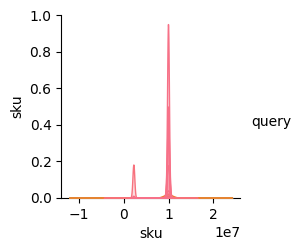

In [16]:
sns.pairplot(newdf, hue='query')

<Axes: >

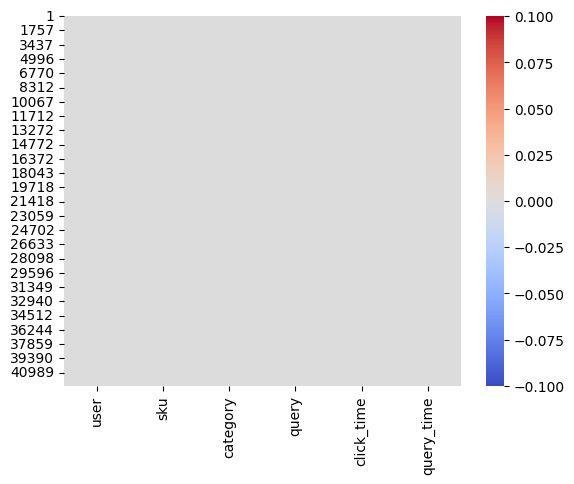

In [17]:
sns.heatmap(newdf.isnull(),cmap='coolwarm')

# Data Preprocessing

In [18]:
newdf['query_length'] = newdf['query'].apply(len)
newdf

,user,sku,category,query,click_time,query_time,query_length
1,00033dbced6acd3626c4b56ff5c55b8d69911681,9854804,abcat0701002,Gears of war,2011-09-25 13:35:42.198,2011-09-25 13:35:33.234,12
12,0010a136a422578130886603598d52f326a8927b,9854804,abcat0701002,Gears of war 3,2011-10-08 15:54:06.4,2011-10-08 15:53:31.486,14
23,001d856329a212eb052e1597663150a2421a3c02,9854804,abcat0701002,Gears of war 3,2011-09-07 17:48:58.823,2011-09-07 17:48:52.138,14
31,0030b51e85341499f00456e0706f9a5fec8d1d1e,9854804,abcat0701002,Gears of war 3,2011-09-05 20:25:51.207,2011-09-05 20:25:04.134,14
39,004070311172f0fa3974a88133b5769135ac2938,9854804,abcat0701002,Gears of war,2011-09-20 02:25:50.707,2011-09-20 02:25:34.905,12
...,...,...,...,...,...,...,...
42318,ffad00eed46cb26a07f8bff3d486517ae954a156,9854804,abcat0701002,Gears of war,2011-09-18 13:38:26.501,2011-09-18 13:35:23.344,12
42336,ffc71fdb3a23e44c42d5b0f6a3000900a84627c8,2107458,abcat0701002,battefield 3,2011-10-20 22:25:26.742,2011-10-20 22:24:26.833,12
42340,ffd516c399d0e348b5d4d707a29ccbe9defe384b,2107458,abcat0701002,battefield,2011-10-29 12:14:37.458,2011-10-29 12:14:28.764,10
42343,ffdd8017f1216292021162aa4513d476500c09ce,9854804,abcat0701002,Gears of war 3,2011-09-23 05:44:36.313,2011-09-23 05:44:20.78,14


<Axes: xlabel='query_length', ylabel='Count'>

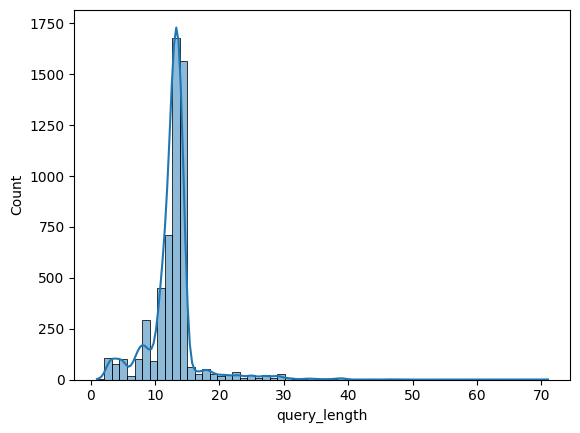

In [19]:
sns.histplot(newdf['query_length'],bins=60,kde=True)

In [20]:
X = newdf.drop(['user','sku','category'],axis=1)
y = newdf['sku']

In [21]:
X

,query,click_time,query_time,query_length
1,Gears of war,2011-09-25 13:35:42.198,2011-09-25 13:35:33.234,12
12,Gears of war 3,2011-10-08 15:54:06.4,2011-10-08 15:53:31.486,14
23,Gears of war 3,2011-09-07 17:48:58.823,2011-09-07 17:48:52.138,14
31,Gears of war 3,2011-09-05 20:25:51.207,2011-09-05 20:25:04.134,14
39,Gears of war,2011-09-20 02:25:50.707,2011-09-20 02:25:34.905,12
...,...,...,...,...
42318,Gears of war,2011-09-18 13:38:26.501,2011-09-18 13:35:23.344,12
42336,battefield 3,2011-10-20 22:25:26.742,2011-10-20 22:24:26.833,12
42340,battefield,2011-10-29 12:14:37.458,2011-10-29 12:14:28.764,10
42343,Gears of war 3,2011-09-23 05:44:36.313,2011-09-23 05:44:20.78,14


In [22]:
df['click_time'] = pd.to_datetime(df['click_time'], errors='coerce')

In [23]:
df['click_time'] = pd.to_datetime(df['click_time'], format='%Y-%m-%d %H:%M:%S.%f', errors='coerce')
df['click_time'] = df['click_time'].fillna(pd.to_datetime(df['click_time'], format='%Y-%m-%d %H:%M:%S', errors='coerce'))

In [24]:
df['click_time'] = pd.to_datetime(df['click_time'], format='%Y-%m-%d %H:%M:%S.%f', errors='coerce')
df['click_time'] = df['click_time'].fillna(pd.to_datetime(df['click_time'], format='%Y-%m-%d %H:%M:%S', errors='coerce'))

In [25]:
df['click_time'] = pd.to_datetime(df['click_time'], format='mixed', errors='coerce')

In [26]:
print(df['click_time'].isna().sum())
df = df.dropna(subset=['click_time'])

35


In [27]:
df

,user,sku,category,query,click_time,query_time
0,0001cd0d10bbc585c9ba287c963e00873d4c0bfd,2032076,abcat0701002,gears of war,2011-10-09 17:22:56.101,2011-10-09 17:21:42.917
1,00033dbced6acd3626c4b56ff5c55b8d69911681,9854804,abcat0701002,Gears of war,2011-09-25 13:35:42.198,2011-09-25 13:35:33.234
2,00033dbced6acd3626c4b56ff5c55b8d69911681,2670133,abcat0701002,Gears of war,2011-09-25 13:36:08.668,2011-09-25 13:35:33.234
3,00033dbced6acd3626c4b56ff5c55b8d69911681,9984142,abcat0701002,Assassin creed,2011-09-25 13:37:23.709,2011-09-25 13:37:00.049
4,0007756f015345450f7be1df33695421466b7ce4,2541184,abcat0701002,dead island,2011-09-11 15:15:34.336,2011-09-11 15:15:26.206
...,...,...,...,...,...,...
42360,fff95d849a4d9c9946e081459471adf4a7192d79,2670133,abcat0701002,Modern warfare 3,2011-09-27 22:53:29.344,2011-09-27 22:53:04.644
42361,fffa393d127dec90b7eae4718535bd16be3b394d,2173065,abcat0701002,Batman,2011-10-14 12:44:14.669,2011-10-14 12:44:07.004
42362,fffa393d127dec90b7eae4718535bd16be3b394d,3046603,abcat0701002,Batman,2011-10-14 12:44:31.228,2011-10-14 12:44:07.004
42363,fffd288ec29a96dbac7356bcda0a1e9f88255a5b,2340293,abcat0701002,360 games,2011-10-10 08:46:10.368,2011-10-10 08:43:56.768


In [28]:
df['query_time'] = pd.to_datetime(df['query_time'], errors='coerce')
print(df['query_time'].isna().sum())

46


In [29]:
df = df.dropna(subset=['query_time'])

In [30]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
Index: 42284 entries, 0 to 42364
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user        42284 non-null  object        
 1   sku         42284 non-null  int64         
 2   category    42284 non-null  object        
 3   query       42284 non-null  object        
 4   click_time  42284 non-null  datetime64[ns]
 5   query_time  42284 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 2.3+ MB


In [32]:
df['click_time_numeric'] = (df['click_time'] - df['click_time'].min()).dt.total_seconds()
df['query_time_numeric'] = (df['query_time'] - df['query_time'].min()).dt.total_seconds()

In [33]:
df = df.drop(['click_time', 'query_time'], axis=1)
df

,user,sku,category,query,click_time_numeric,query_time_numeric
0,0001cd0d10bbc585c9ba287c963e00873d4c0bfd,2032076,abcat0701002,gears of war,5145759.080,5145758.647
1,00033dbced6acd3626c4b56ff5c55b8d69911681,9854804,abcat0701002,Gears of war,3922525.177,3922588.964
2,00033dbced6acd3626c4b56ff5c55b8d69911681,2670133,abcat0701002,Gears of war,3922551.647,3922588.964
3,00033dbced6acd3626c4b56ff5c55b8d69911681,9984142,abcat0701002,Assassin creed,3922626.688,3922675.779
4,0007756f015345450f7be1df33695421466b7ce4,2541184,abcat0701002,dead island,2718917.315,2718981.936
...,...,...,...,...,...,...
42360,fff95d849a4d9c9946e081459471adf4a7192d79,2670133,abcat0701002,Modern warfare 3,4128792.323,4128840.374
42361,fffa393d127dec90b7eae4718535bd16be3b394d,2173065,abcat0701002,Batman,5561037.648,5561102.734
42362,fffa393d127dec90b7eae4718535bd16be3b394d,3046603,abcat0701002,Batman,5561054.207,5561102.734
42363,fffd288ec29a96dbac7356bcda0a1e9f88255a5b,2340293,abcat0701002,360 games,5201153.347,5201092.498


In [36]:
le = LabelEncoder()
newdf['query'] = le.fit_transform(newdf['query'])

In [37]:
newdf

,user,sku,category,query,click_time,query_time,query_length
1,00033dbced6acd3626c4b56ff5c55b8d69911681,9854804,abcat0701002,169,2011-09-25 13:35:42.198,2011-09-25 13:35:33.234,12
12,0010a136a422578130886603598d52f326a8927b,9854804,abcat0701002,171,2011-10-08 15:54:06.4,2011-10-08 15:53:31.486,14
23,001d856329a212eb052e1597663150a2421a3c02,9854804,abcat0701002,171,2011-09-07 17:48:58.823,2011-09-07 17:48:52.138,14
31,0030b51e85341499f00456e0706f9a5fec8d1d1e,9854804,abcat0701002,171,2011-09-05 20:25:51.207,2011-09-05 20:25:04.134,14
39,004070311172f0fa3974a88133b5769135ac2938,9854804,abcat0701002,169,2011-09-20 02:25:50.707,2011-09-20 02:25:34.905,12
...,...,...,...,...,...,...,...
42318,ffad00eed46cb26a07f8bff3d486517ae954a156,9854804,abcat0701002,169,2011-09-18 13:38:26.501,2011-09-18 13:35:23.344,12
42336,ffc71fdb3a23e44c42d5b0f6a3000900a84627c8,2107458,abcat0701002,377,2011-10-20 22:25:26.742,2011-10-20 22:24:26.833,12
42340,ffd516c399d0e348b5d4d707a29ccbe9defe384b,2107458,abcat0701002,376,2011-10-29 12:14:37.458,2011-10-29 12:14:28.764,10
42343,ffdd8017f1216292021162aa4513d476500c09ce,9854804,abcat0701002,171,2011-09-23 05:44:36.313,2011-09-23 05:44:20.78,14
